In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pysam
from pyBioInfo.IO.File import BedFile

In [2]:
# Transcript annotation
anno = pd.read_csv("/home/chenzonggui/species/homo_sapiens/GRCh38.p13/gencode.v39.annotation.tsv", sep="\t", index_col=0)
anno = anno[anno["Canonical"]]
anno = anno[(anno["GeneType"] == "protein_coding") \
            | (anno["GeneType"] == "lncRNA") \
            | ([gt.startswith("TR_") for gt in anno["GeneType"]]) \
            | ([gt.startswith("IG_") for gt in anno["GeneType"]])]

transcripts = dict()
with BedFile("/home/chenzonggui/species/homo_sapiens/GRCh38.p13/gencode.v39.annotation.transcripts.bed.gz") as f:
    for t in f:
        transcripts[t.name] = t

In [3]:
# OR* genes clusters
regions = []

anno1 = anno[[gname.startswith("OR") for gname in anno["GeneName"]]]
or_cluster_id = 0
for chrom, anno2 in anno1.groupby(by="Chrom"):
    if chrom == "chrX":
        continue
    anno2 = anno2.sort_values(by="Start")
    array = []
    for start, end in anno2[["Start", "End"]].values:
        array.append([start, end])
    array.sort()
    clusters = []
    max_end = 0
    for start, end in array:
        if len(clusters) == 0:
            clusters.append([[start, end]])
            max_end = end
        else:
            if start - max_end > 2000000:
                clusters.append([[start, end]])
                max_end = end
            else:
                clusters[-1].append([start, end])
                max_end = max(max_end, end)
    for cluster in clusters:
        start = min([item[0] for item in cluster])
        end = max([item[1] for item in cluster])
        r = {"name": "OR_cluster_%d" % or_cluster_id, "chrom": chrom, "start": start, "end": end}
        regions.append(r)
        or_cluster_id += 1
        
regions.append({"name": "TRA", "chrom": "chr14", "start": 21621904, "end": 22552132})
regions.append({"name": "TRB", "chrom": "chr7", "start": 142299011, "end": 142813287})
regions.append({"name": "MHC", "chrom": "chr6", "start": 28510120, "end": 33480577})
regions.append({"name": "IGH", "chrom": "chr14", "start": 105586437, "end": 106879844})
regions.append({"name": "IGK", "chrom": "chr2", "start": 88857361,"end": 90235368})
regions.append({"name": "IGL", "chrom": "chr22", "start": 22026076,"end": 22922913})

for r in regions:
    r["view_start"] = int(r["start"] / 1000000) * 1000000
    r["view_end"] = (int(r["end"] / 1000000) + 1) * 1000000
    
print(len(regions))

50


In [7]:
f_vcf_giab = "../../public/GRCh38-HG001-Variant-Calls/results/benchmark_autosomal_v4.2.1_chrx_v3.3.2.vcf.gz"
f_vcf_1kg = "../../public/OneKG/NA12878.1kg.GRCh38.reheader.patmat.vcf.gz"
f_vcf_pacbio = "../../3_NanoStrandSeq_PseudoBulk/results/snvs/concated/nanocaller/PacBio.full.vcf.gz"
f_vcf_ont = "../../3_NanoStrandSeq_PseudoBulk/results/snvs/concated/nanocaller/PacBio.full.vcf.gz"
f_vcf_nss = "../../4_NanoStrandSeq_Phasing/results/HG001_Cell_350/round2/snvs.vcf.gz"

{'name': 'OR_cluster_0', 'chrom': 'chr1', 'start': 450739, 'end': 686654, 'view_start': 0, 'view_end': 1000000}
{'name': 'OR_cluster_1', 'chrom': 'chr1', 'start': 52372828, 'end': 52404423, 'view_start': 52000000, 'view_end': 53000000}
{'name': 'OR_cluster_2', 'chrom': 'chr1', 'start': 158398521, 'end': 159536007, 'view_start': 158000000, 'view_end': 160000000}
{'name': 'OR_cluster_3', 'chrom': 'chr1', 'start': 247449117, 'end': 248682328, 'view_start': 247000000, 'view_end': 249000000}
{'name': 'OR_cluster_4', 'chrom': 'chr10', 'start': 45302649, 'end': 45315608, 'view_start': 45000000, 'view_end': 46000000}
{'name': 'OR_cluster_5', 'chrom': 'chr11', 'start': 4367262, 'end': 7941708, 'view_start': 4000000, 'view_end': 8000000}
{'name': 'OR_cluster_6', 'chrom': 'chr11', 'start': 48216809, 'end': 49982535, 'view_start': 48000000, 'view_end': 50000000}
{'name': 'OR_cluster_7', 'chrom': 'chr11', 'start': 54603068, 'end': 59713845, 'view_start': 54000000, 'view_end': 60000000}
{'name': 'OR

/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


{'name': 'OR_cluster_21', 'chrom': 'chr17', 'start': 39921040, 'end': 39927601, 'view_start': 39000000, 'view_end': 40000000}
{'name': 'OR_cluster_22', 'chrom': 'chr17', 'start': 58148448, 'end': 58171116, 'view_start': 58000000, 'view_end': 59000000}
{'name': 'OR_cluster_23', 'chrom': 'chr19', 'start': 107103, 'end': 113156, 'view_start': 0, 'view_end': 1000000}
{'name': 'OR_cluster_24', 'chrom': 'chr19', 'start': 8721633, 'end': 9252625, 'view_start': 8000000, 'view_end': 10000000}
{'name': 'OR_cluster_25', 'chrom': 'chr19', 'start': 14789259, 'end': 15949958, 'view_start': 14000000, 'view_end': 16000000}
{'name': 'OR_cluster_26', 'chrom': 'chr2', 'start': 147930396, 'end': 148021604, 'view_start': 147000000, 'view_end': 149000000}
{'name': 'OR_cluster_27', 'chrom': 'chr2', 'start': 189770266, 'end': 189784339, 'view_start': 189000000, 'view_end': 190000000}
{'name': 'OR_cluster_28', 'chrom': 'chr2', 'start': 200908976, 'end': 200963660, 'view_start': 200000000, 'view_end': 201000000

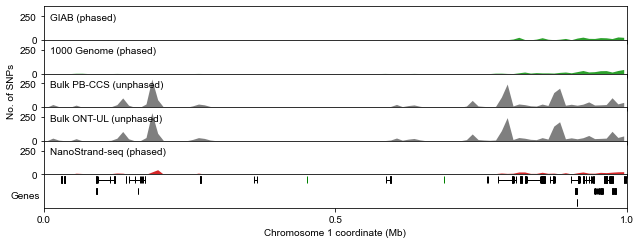

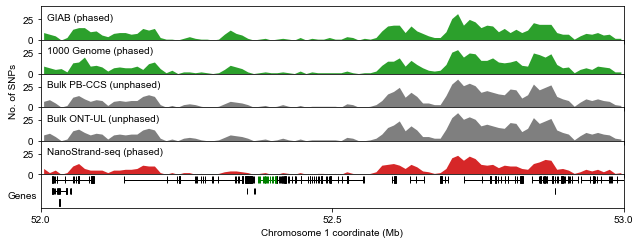

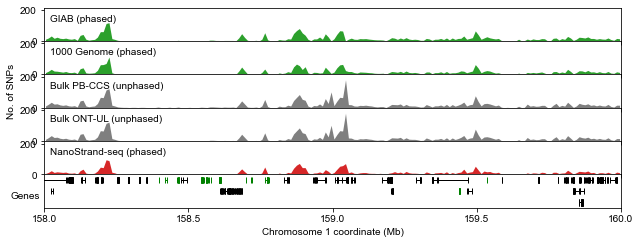

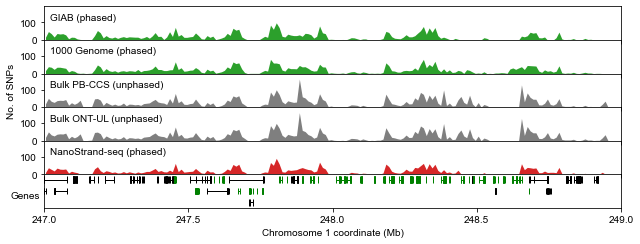

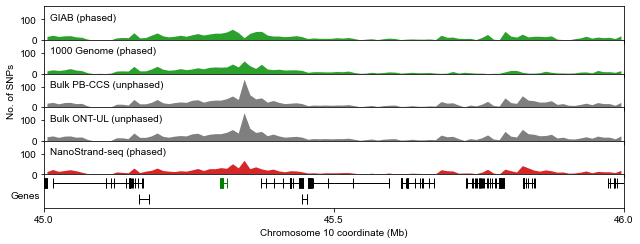

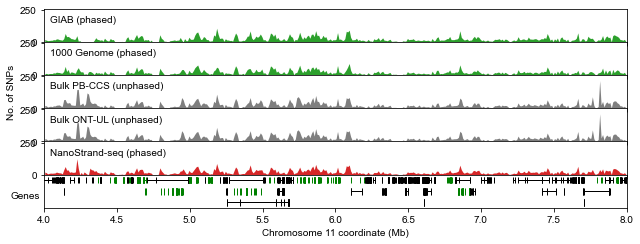

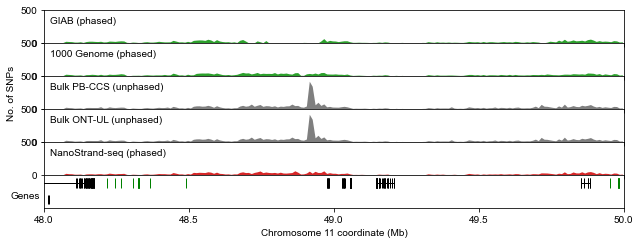

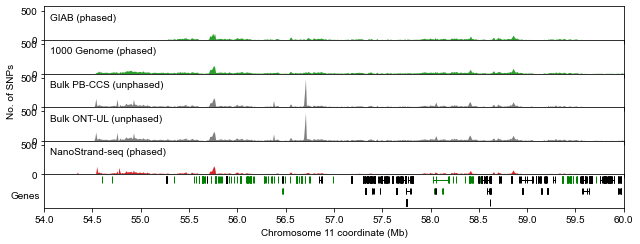

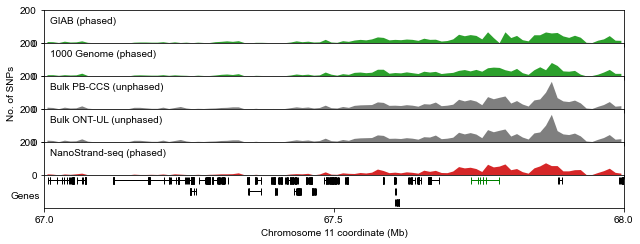

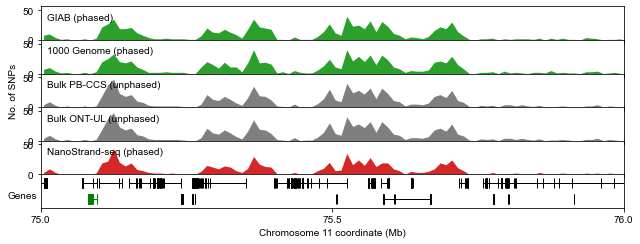

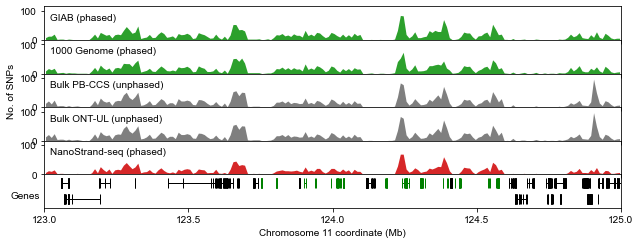

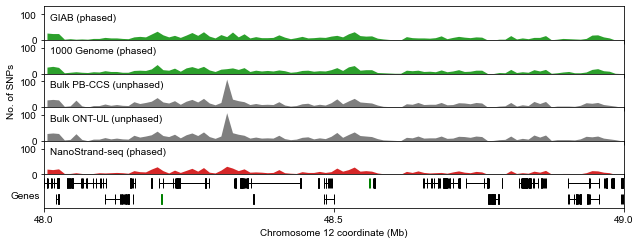

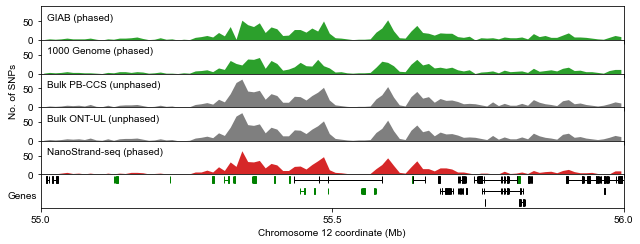

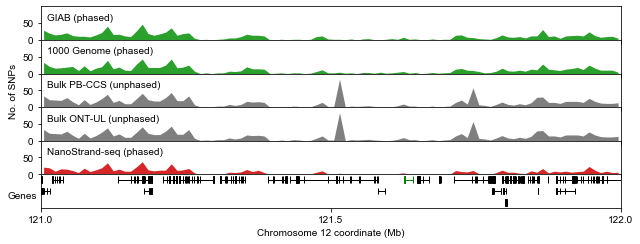

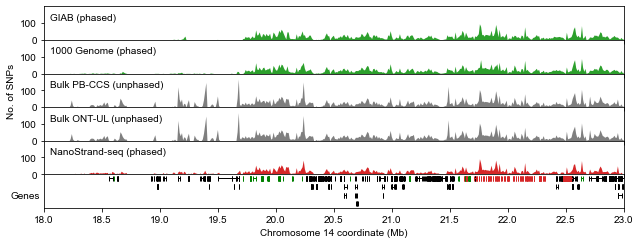

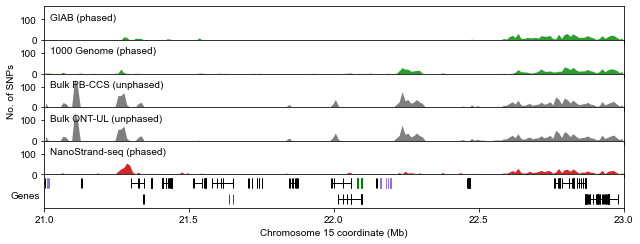

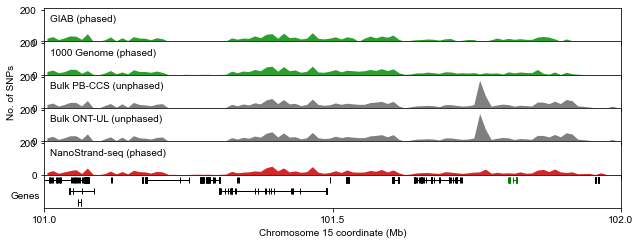

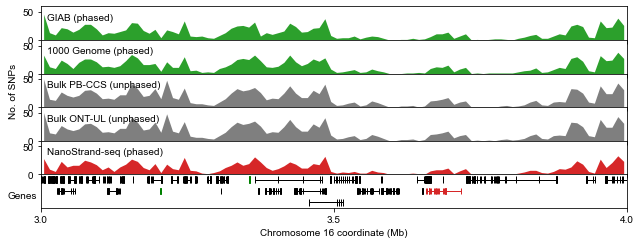

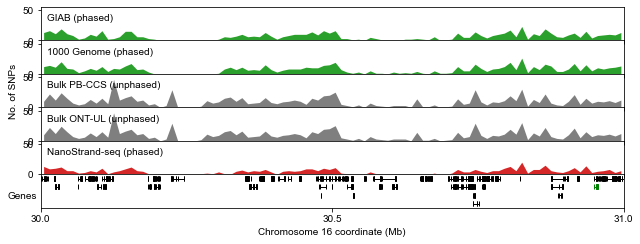

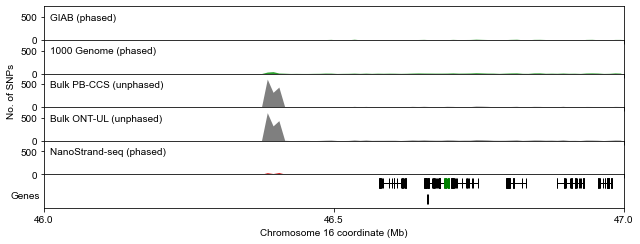

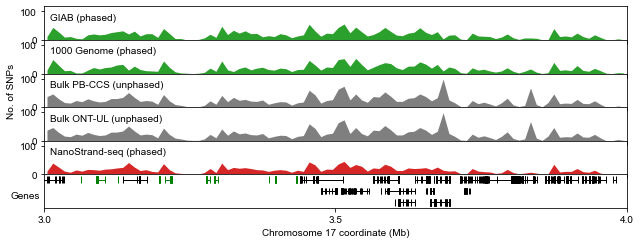

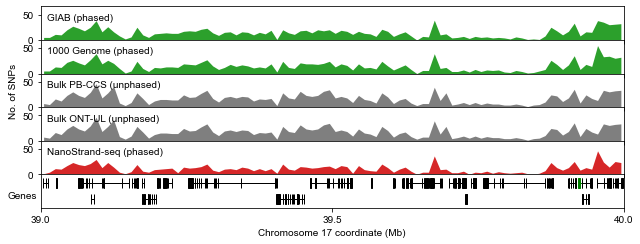

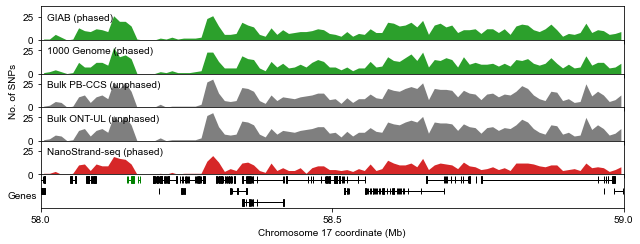

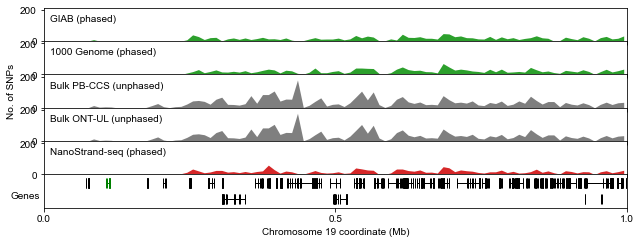

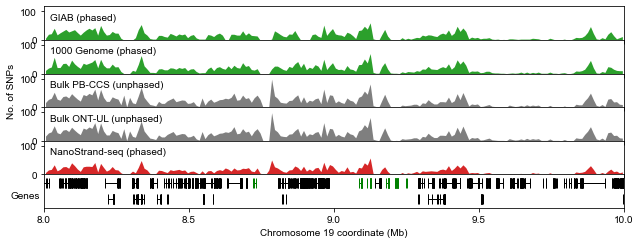

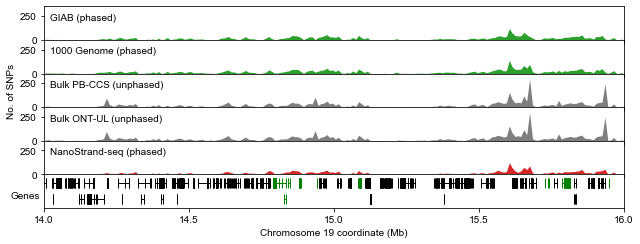

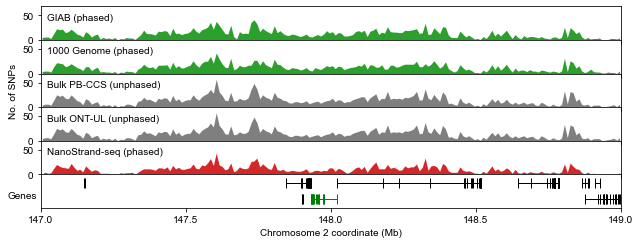

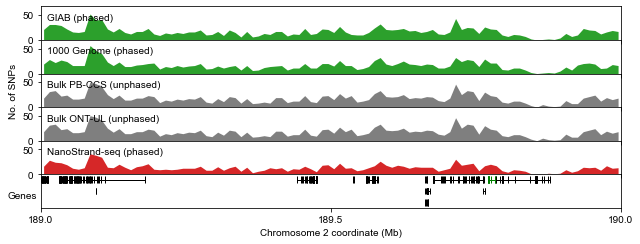

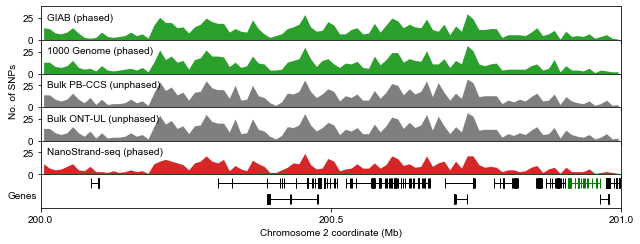

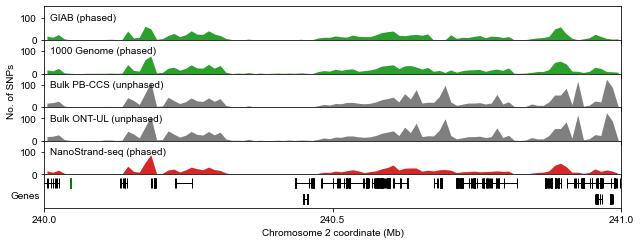

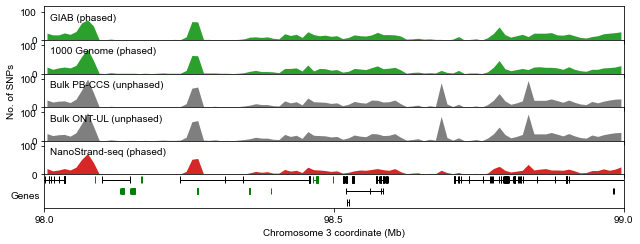

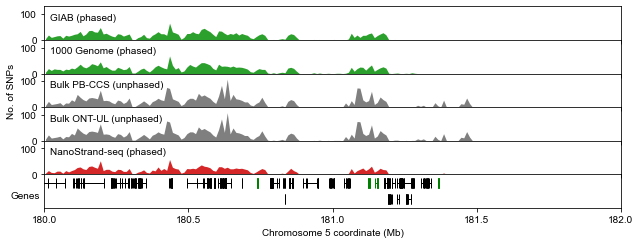

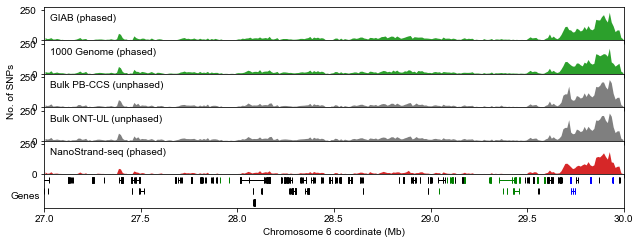

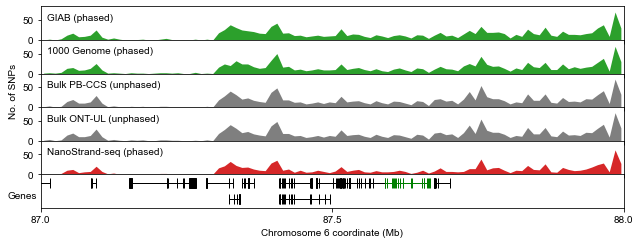

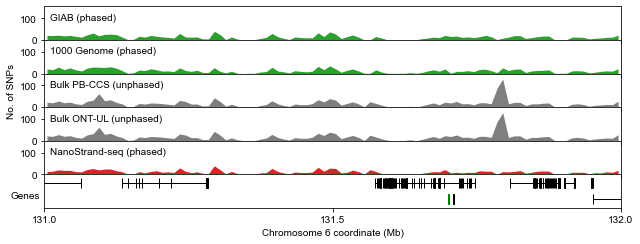

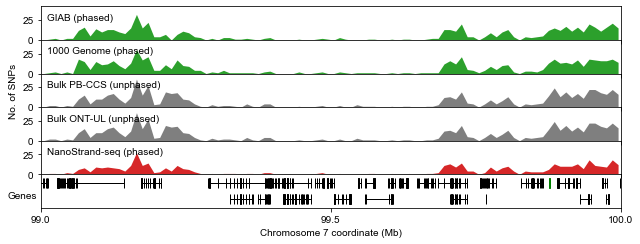

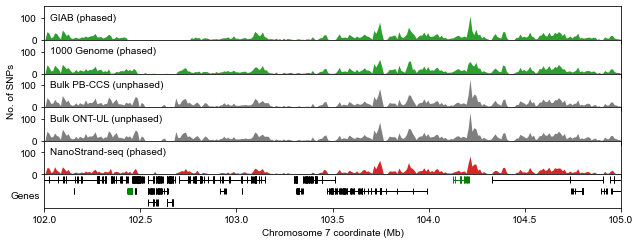

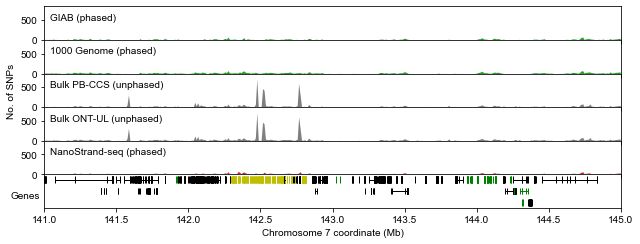

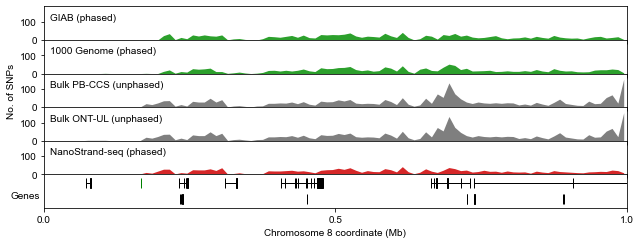

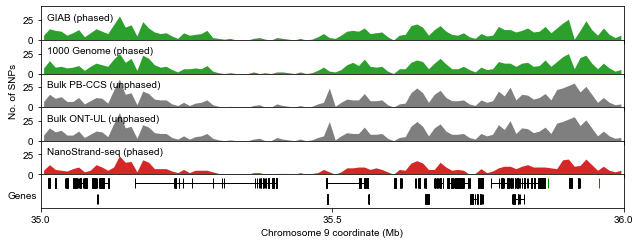

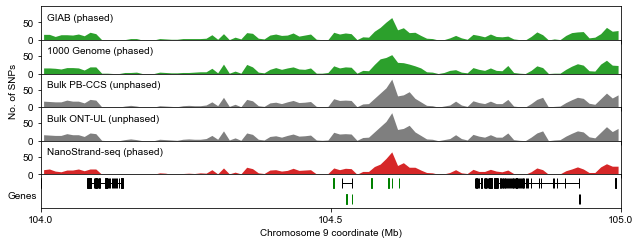

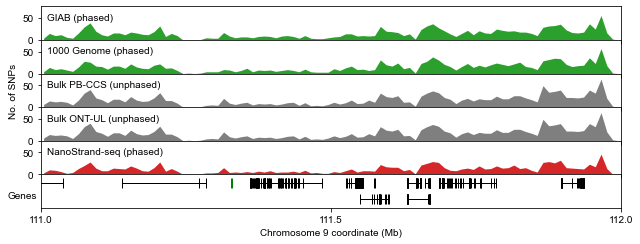

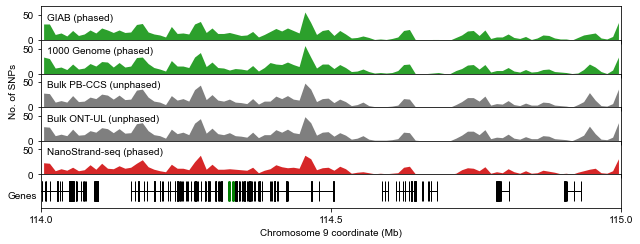

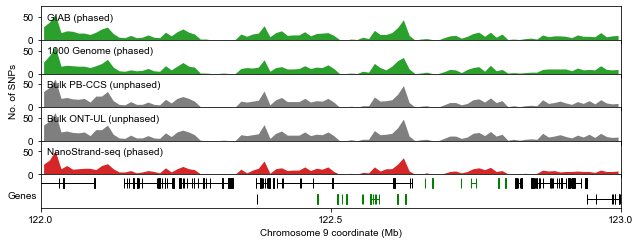

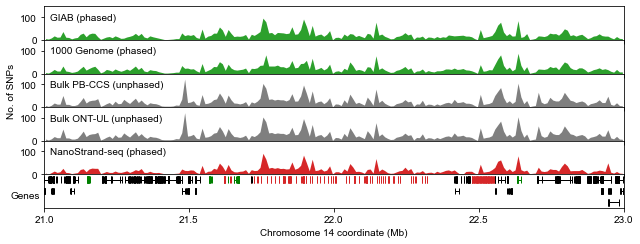

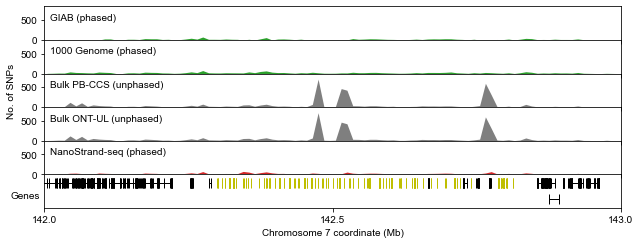

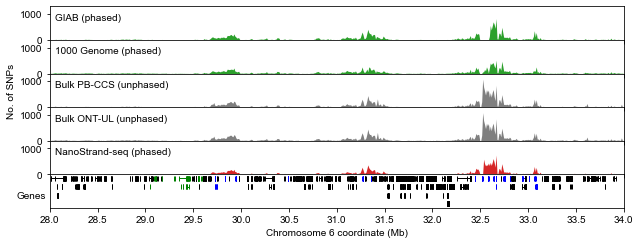

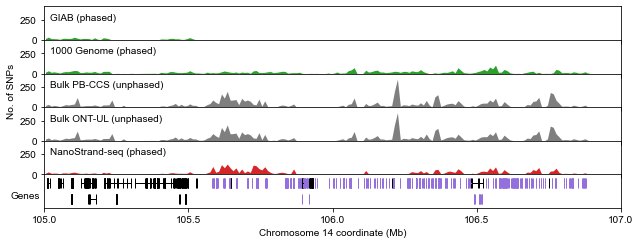

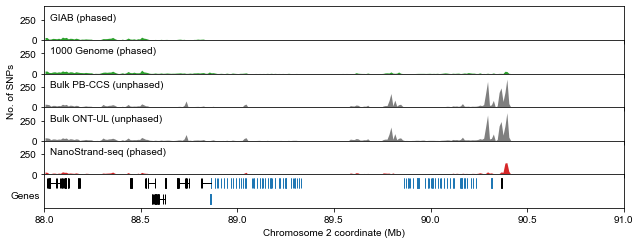

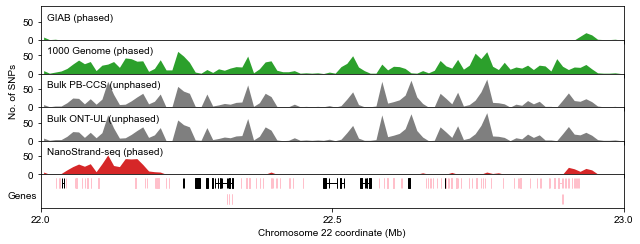

In [9]:
def get_snv_counts(path, chrom, start, end, bin_width):
    bin_count = int((end - start) / bin_width)
    counts = np.zeros(bin_count)
    with pysam.VariantFile(path) as f:
        for item in f.fetch(chrom, start, end):
            pos = item.start
            counts[int((pos - start) / bin_width)] += 1
    return counts

vcf_list = [f_vcf_giab, f_vcf_1kg, f_vcf_pacbio, f_vcf_ont, f_vcf_nss]

for region in regions:
    print(region)
    
    chrom, start, end = region["chrom"], region["view_start"], region["view_end"]
    
    anno1 = anno[(anno["Chrom"] == chrom) & (anno["Start"] < end) & (anno["End"] > start)]

    bin_width = 10000    
    array = []
    for path in vcf_list:
        counts = get_snv_counts(path, chrom, start, end, bin_width)
        array.append(counts)

    fig, axs = plt.subplots(6, 1, figsize=(9, 3.5), sharex=True, gridspec_kw={"hspace": 0.0})

    #
    names = ["GIAB (phased)", "1000 Genome (phased)", "Bulk PB-CCS (unphased)", "Bulk ONT-UL (unphased)", "NanoStrand-seq (phased)"]
    colors = ["C2", "C2", "C7", "C7", "C3"]
    vmax = max([max(counts) for counts in array])
    ymax = vmax * 1.2
    for i, (counts, name, color) in enumerate(zip(array, names, colors)):
        ax = axs[i]
        plt.sca(ax)
        xs = np.arange(start, end, bin_width) + bin_width / 2
        plt.fill_between(xs, counts, color=color, lw=0)
        if i == 2:
            plt.ylabel("No. of SNPs")
        plt.ylim(0, ymax)
        plt.text(start + (end - start) * 0.01, ymax * 0.8, name, va="top")
    
    
    #
    ax = axs[-1]
    plt.sca(ax)
    row_offset = defaultdict(int)
    blocks = []
    exons = []
    for tid, (t_start, t_end, name, strand) in zip(anno1.index, anno1[["Start", "End", "GeneName", "Strand"]].values):
        row_index = 0
        while True:
            if row_offset[row_index] <= t_start:
                row_offset[row_index] = t_end
                break
            else:
                row_index += 1
        y = - row_index   
        x1, x2 = t_start, t_end
        
        if name.startswith("HLA"):
            color = "blue"
        elif name.startswith("OR"):
            color = "green"
        elif name.startswith("TRA"):
            color = "C3"
        elif name.startswith("TRB"):
            color = "y"
        elif name.startswith("IGK"):
            color = "C0"
        elif name.startswith("IGH"):
            color = "mediumpurple"
        elif name.startswith("IGL"):
            color = "pink"
        else:
            color = "black"

        # gene
        x = (x1 + x2) / 2
        w = x2 - x1
        h = 0.6
        b = y - 0.3
        blocks.append([x, h, b, w, color])

        # line
        plt.plot([x1, x2], [y, y], lw=1, color=color)

        # exon
        for exon in transcripts[tid].blocks:
            x = (exon[0] + exon[1]) / 2
            w = exon[1] - exon[0]
            h = 0.6
            b = y - h / 2
            exons.append([x, h, b, w, color])

    if False: # gene body
        plt.bar([item[0] for item in blocks], 
                [item[1] for item in blocks], 
                bottom=[item[2] for item in blocks], 
                width=[item[3] for item in blocks], 
                color=[item[4] for item in blocks])
    if True: # exon
        plt.bar([item[0] for item in exons], 
                [item[1] for item in exons], 
                bottom=[item[2] for item in exons], 
                width=[item[3] for item in exons],
                edgecolor=[item[4] for item in exons], 
                lw=1,
                color=[item[4] for item in exons])
    plt.xlim(start, end)
    plt.ylim(-max(row_offset.keys()) - 0.5, 0.5)
    plt.xlabel("Chromosome %s coordinate (Mb)" % chrom[3:])
    plt.ylabel("Genes", rotation=0, ha="right", va="top")
    plt.yticks([])
    xs = np.arange(start, end + 1, 500000)
    plt.xticks(xs, [str(x / 1000000) for x in xs])

    #
    plt.tight_layout()
    # plt.show()
    plt.savefig("figures/gene_model_and_snv_density.%s.pdf" % region["name"], dpi=300)
    # plt.close()

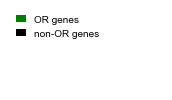

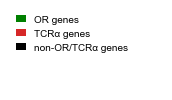

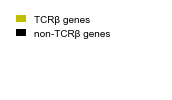

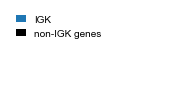

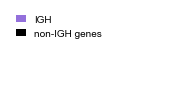

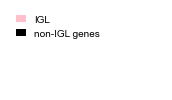

In [62]:
plt.figure(figsize=(2.5, 1.5))
plt.bar([0], [1], color="green", label="OR genes")
plt.bar([0], [1], color="black", label="non-OR genes")
plt.xlim(2, 3)
plt.ylim(2, 3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.yticks([])
plt.xticks([])
plt.legend(handlelength=1, frameon=False, loc="upper left", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.savefig("figures/gene_model_and_snv_density.legend.OR.pdf", dpi=300)


plt.figure(figsize=(2.5, 1.5))
plt.bar([0], [1], color="green", label="OR genes")
plt.bar([0], [1], color="C3", label="TCRα genes")
plt.bar([0], [1], color="black", label="non-OR/TCRα genes")
plt.xlim(2, 3)
plt.ylim(2, 3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.yticks([])
plt.xticks([])
plt.legend(handlelength=1, frameon=False, loc="upper left", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.savefig("figures/gene_model_and_snv_density.legend.OR_TCRa.pdf", dpi=300)


plt.figure(figsize=(2.5, 1.5))
plt.bar([0], [1], color="y", label="TCRβ genes")
plt.bar([0], [1], color="black", label="non-TCRβ genes")
plt.xlim(2, 3)
plt.ylim(2, 3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.yticks([])
plt.xticks([])
plt.legend(handlelength=1, frameon=False, loc="upper left", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.savefig("figures/gene_model_and_snv_density.legend.TCRb.pdf", dpi=300)

plt.figure(figsize=(2.5, 1.5))
plt.bar([0], [1], color="C0", label="IGK")
plt.bar([0], [1], color="black", label="non-IGK genes")
plt.xlim(2, 3)
plt.ylim(2, 3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.yticks([])
plt.xticks([])
plt.legend(handlelength=1, frameon=False, loc="upper left", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.savefig("figures/gene_model_and_snv_density.legend.IGK.pdf", dpi=300)

plt.figure(figsize=(2.5, 1.5))
plt.bar([0], [1], color="mediumpurple", label="IGH")
plt.bar([0], [1], color="black", label="non-IGH genes")
plt.xlim(2, 3)
plt.ylim(2, 3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.yticks([])
plt.xticks([])
plt.legend(handlelength=1, frameon=False, loc="upper left", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.savefig("figures/gene_model_and_snv_density.legend.IGH.pdf", dpi=300)

plt.figure(figsize=(2.5, 1.5))
plt.bar([0], [1], color="pink", label="IGL")
plt.bar([0], [1], color="black", label="non-IGL genes")
plt.xlim(2, 3)
plt.ylim(2, 3)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.yticks([])
plt.xticks([])
plt.legend(handlelength=1, frameon=False, loc="upper left", bbox_to_anchor=(0, 1))
plt.tight_layout()
plt.savefig("figures/gene_model_and_snv_density.legend.IGL.pdf", dpi=300)

In [64]:
def load_vcf(path, chrom, start, end):
    snvs = dict()
    with pysam.VariantFile(path) as f:
        name = list(f.header.samples)[0]
        for record in f.fetch(chrom, start, end):
            gt = record.samples[name]["GT"]
            ps = ""
            try:
                ps = record.samples[name]["PS"]
            except KeyError:
                pass
            a1, a2 = record.alleles[gt[0]], record.alleles[gt[1]]
            if len(a1) > 1 or len(a2) > 1:
                continue
            snvs[record.start] = [record.ref, a1, a2, ps]
    return snvs

rows = []
for region in regions:
    chrom, start, end = region["chrom"], region["start"], region["end"]
    anno1 = anno[(anno["Chrom"] == chrom) & (anno["Start"] < end) & (anno["End"] > start)]
    
    snvs1 = load_vcf(f_vcf_giab, chrom, start, end)
    snvs2 = load_vcf(f_vcf_1kg, chrom, start, end)
    snvs3 = load_vcf(f_vcf_pacbio, chrom, start, end)
    snvs4 = load_vcf(f_vcf_nss, chrom, start, end)
    
    sites1 = set(snvs1.keys())
    sites2 = set(snvs2.keys())
    sites3 = set(snvs3.keys())
    sites4 = set(snvs4.keys())
    
    calling_recall = 0
    if len(sites1) > 0:
        calling_recall = len(sites1 & sites4) / len(sites1)
    
    calling_precision = 0
    if len(sites4) > 0:
        calling_precision = len(sites1 & sites4) / len(sites4)
    
    genotyping_precision = 0
    phasing_precision = 0
    sites = sites1 & sites4
    if len(sites) > 0:
        n = 0
        n1 = 0
        n2 = 0
        for pos in sites:
            snv1 = snvs1[pos]
            snv4 = snvs4[pos]
            ref1, a1, a2, ps1 = snv1
            ref2, b1, b2, ps2 = snv4
            if a1 == a2:
                if b1 == b2:
                    if a1 == b1:
                        n += 1
            else: # a1 != a2
                if a1 == b1 and a2 == b2:
                    n += 1
                    if ps1 == "PATMAT" and ps2 == "PATMAT":
                        n1 += 1
                elif a1 == b2 and a2 == b1:
                    n += 1
                    if ps1 == "PATMAT" and ps2 == "PATMAT":
                        n2 += 1
        genotyping_precision = n / len(sites)
        if n1 + n2 > 0:
            phasing_precision = max(n1, n2) / (n1 + n2)
            
    gene_name_list = ",".join(sorted(anno1["GeneName"]))
            
    row = [region["name"], chrom, start, end, 
           len(sites1), len(sites4), 
           calling_recall, calling_precision, genotyping_precision, phasing_precision,
           gene_name_list
          ]
    rows.append(row)

In [65]:
df = pd.DataFrame(rows)
df.columns = ["Name", "Chrom", "Start", "End", "GIAB", "NSS", 
              "Calling_Recall", "Calling_Precision", "Genotyping_Precision", "Phasing_Precision", 
              "Genes"]
df.to_csv("results/benchmark_of_clusters.tsv", sep="\t", index=False)